# More feature engineering with SQL (For Predicting if a team will win)

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
# cnx = create_engine('postgresql://username:password@ip_address:port/database')
cnx = create_engine('postgresql://lucyallen@localhost:5432/nhl')

### Merging home and away columns then creating more features

In [3]:
df = pd.read_sql_query('''select *, (hometenwinpct - awaytenwinpct) as tenwinpctdiff, (hometengoalsfor-awaytengoalsfor) as tengamegoalfordiff,
(homefivegoalsfor-awayfivegoalsfor) as fivegamegoalfordiff, (hometengoalsagainst-awaytengoalsagainst) as tengamegoalagainstdiff,
(homefivegoalsagainst-awayfivegoalsagainst) as fivegamegoalagainstdiff, (homefivegoalsfor-homefivegoalsagainst) as homefivegoaldiff, 
(hometengoalsfor-hometengoalsagainst) as hometengoaldiff, (awayfivegoalsfor-awayfivegoalsagainst) as awayfivegoaldiff,
(awaytengoalsfor-awaytengoalsagainst) as awaytengoaldiff,
case when homedivision = awaydivision then 1 else 0 end as samedivision,
case when homeresult = 'Win' then 1 else 0 end as win
from 
(select * 
from nhl_home_new nh 
left join nhl_away_new na 
on nh.hometeam = na.hometeam and na.date = nh.date
) as tablehome''', cnx)

###### Removing Duplicate Columns from sql merge

In [4]:
nhl = df.loc[:,~df.columns.duplicated()]

In [5]:
nhl.columns

Index(['index', 'homedivision', 'hometeam', 'date', 'awayteam', 'homegoals',
       'awaygoals', 'homeresult', 'datetime', 'homeprevpct', 'homeprevwins',
       'homeprevloss', 'homeprevties', 'homefivepct', 'homefivewins',
       'homefiveloss', 'homefiveties', 'hometenpct', 'hometenwins',
       'hometenloss', 'hometenties', 'homefivegoalsfor',
       'homefivegoalsagainst', 'hometengoalsfor', 'hometengoalsagainst',
       'homelastfivewins', 'homelastfiveloss', 'homelastfiveties',
       'homelasttenwins', 'homelasttenloss', 'homelasttenties',
       'homefivewinpct', 'hometenwinpct', 'awaydivision', 'awayresult',
       'awayprevpct', 'awayprevwins', 'awayprevloss', 'awayprevties',
       'awayfivepct', 'awayfivewins', 'awayfiveloss', 'awayfiveties',
       'awaytenpct', 'awaytenwins', 'awaytenloss', 'awaytenties',
       'awayfivegoalsfor', 'awayfivegoalsagainst', 'awaytengoalsfor',
       'awaytengoalsagainst', 'awaylastfivewins', 'awaylastfiveloss',
       'awaylastfiveties', 'a

In [6]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    954 non-null    int64  
 1   homedivision             954 non-null    object 
 2   hometeam                 954 non-null    object 
 3   date                     954 non-null    object 
 4   awayteam                 954 non-null    object 
 5   homegoals                954 non-null    int64  
 6   awaygoals                954 non-null    int64  
 7   homeresult               954 non-null    object 
 8   datetime                 954 non-null    object 
 9   homeprevpct              938 non-null    float64
 10  homeprevwins             938 non-null    float64
 11  homeprevloss             938 non-null    float64
 12  homeprevties             938 non-null    float64
 13  homefivepct              862 non-null    float64
 14  homefivewins             8

In [7]:
nhl.isna()

,index,homedivision,hometeam,date,awayteam,homegoals,awaygoals,homeresult,datetime,homeprevpct,...,tengamegoalfordiff,fivegamegoalfordiff,tengamegoalagainstdiff,fivegamegoalagainstdiff,homefivegoaldiff,hometengoaldiff,awayfivegoaldiff,awaytengoaldiff,samedivision,win
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
950,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
951,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
952,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
nhl.groupby('hometeam').agg({'win':'sum', 'hometenwinpct':'mean'}).sort_values(by='win', ascending=False)

,win,hometenwinpct
hometeam,,
Tampa Bay,25,0.773913
Boston,22,0.640741
Calgary,20,0.624000
Pittsburgh,20,0.592308
Montreal,19,0.575000
NY Islanders,19,0.623077
Washington,19,0.569231
Carolina,19,0.588000
Vegas,19,0.555556


### Dropping columns with null values

In [7]:
nhl.dropna(inplace=True)

<ipython-input-7-727fdd3092e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl.dropna(inplace=True)


In [8]:
nhl.reset_index(inplace=True)

In [9]:
nhl.columns

Index(['level_0', 'index', 'homedivision', 'hometeam', 'date', 'awayteam',
       'homegoals', 'awaygoals', 'homeresult', 'datetime', 'homeprevpct',
       'homeprevwins', 'homeprevloss', 'homeprevties', 'homefivepct',
       'homefivewins', 'homefiveloss', 'homefiveties', 'hometenpct',
       'hometenwins', 'hometenloss', 'hometenties', 'homefivegoalsfor',
       'homefivegoalsagainst', 'hometengoalsfor', 'hometengoalsagainst',
       'homelastfivewins', 'homelastfiveloss', 'homelastfiveties',
       'homelasttenwins', 'homelasttenloss', 'homelasttenties',
       'homefivewinpct', 'hometenwinpct', 'awaydivision', 'awayresult',
       'awayprevpct', 'awayprevwins', 'awayprevloss', 'awayprevties',
       'awayfivepct', 'awayfivewins', 'awayfiveloss', 'awayfiveties',
       'awaytenpct', 'awaytenwins', 'awaytenloss', 'awaytenties',
       'awayfivegoalsfor', 'awayfivegoalsagainst', 'awaytengoalsfor',
       'awaytengoalsagainst', 'awaylastfivewins', 'awaylastfiveloss',
       'awaylastfi

Dropping columns that would not be relevent with any modeling

In [10]:
nhl.drop(['level_0', 'index', 'homegoals', 'awaygoals', 'homefivepct', 'homefivewins', 'homefiveloss', 'homefiveties', 
         'hometenpct', 'hometenwins', 'hometenloss', 'hometenties', 'awayfivepct', 'awayfivewins', 'awayfiveloss', 'awayfiveties', 
         'awaytenpct', 'awaytenwins', 'awaytenloss', 'awaytenties'], axis=1, inplace=True)

/Users/lucyallen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
nhl.describe()

,homeprevpct,homeprevwins,homeprevloss,homeprevties,homefivegoalsfor,homefivegoalsagainst,hometengoalsfor,hometengoalsagainst,homelastfivewins,homelastfiveloss,...,tengamegoalfordiff,fivegamegoalfordiff,tengamegoalagainstdiff,fivegamegoalagainstdiff,homefivegoaldiff,hometengoaldiff,awayfivegoaldiff,awaytengoaldiff,samedivision,win
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,0.498760,28.131443,22.117268,6.194588,14.722938,14.921392,29.798969,29.864691,2.463918,2.007732,...,-0.166237,-0.315722,-0.094072,0.034794,-0.198454,-0.065722,0.152062,0.006443,0.362113,0.521907
std,0.088479,8.985766,7.409003,2.484433,4.123799,4.203563,6.216590,6.323208,1.245891,1.144949,...,8.902305,5.706550,8.920012,6.021902,6.207325,9.314273,6.238285,9.380623,0.480921,0.499842
min,0.303000,10.000000,7.000000,1.000000,4.000000,3.000000,12.000000,13.000000,0.000000,0.000000,...,-29.000000,-20.000000,-28.000000,-18.000000,-22.000000,-30.000000,-22.000000,-28.000000,0.000000,0.000000
25%,0.425000,22.000000,16.000000,4.000000,12.000000,12.000000,26.000000,26.000000,2.000000,1.000000,...,-6.000000,-4.000000,-6.000000,-4.000000,-5.000000,-6.000000,-4.000000,-6.000000,0.000000,0.000000
50%,0.500000,27.000000,21.000000,6.000000,15.000000,15.000000,29.000000,30.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.566000,34.000000,27.000000,8.000000,17.000000,17.000000,34.000000,34.000000,3.000000,3.000000,...,6.000000,3.000000,6.000000,4.000000,4.000000,6.000000,5.000000,6.000000,1.000000,1.000000
max,0.730000,59.000000,46.000000,14.000000,28.000000,30.000000,52.000000,47.000000,5.000000,5.000000,...,23.000000,17.000000,25.000000,22.000000,20.000000,26.000000,19.000000,27.000000,1.000000,1.000000


In [12]:
nhl.drop(['homeprevpct', 'homeprevwins', 'homeprevloss', 'homeprevties'], axis=1, inplace=True)

/Users/lucyallen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
nhl

,homedivision,hometeam,date,awayteam,homeresult,datetime,homefivegoalsfor,homefivegoalsagainst,hometengoalsfor,hometengoalsagainst,...,tengamegoalfordiff,fivegamegoalfordiff,tengamegoalagainstdiff,fivegamegoalagainstdiff,homefivegoaldiff,hometengoaldiff,awayfivegoaldiff,awaytengoaldiff,samedivision,win
0,Atlantic,Tampa Bay,12/27/18,Philadelphia,Win,2018-12-27,24.0,15.0,51.0,27.0,...,23.0,12.0,-10.0,1.0,9.0,24.0,-2.0,-9.0,0,1
1,Atlantic,Tampa Bay,12/29/18,Montreal,Win,2018-12-29,26.0,19.0,52.0,31.0,...,20.0,14.0,1.0,6.0,7.0,21.0,-1.0,2.0,1,1
2,Atlantic,Tampa Bay,1/8/19,Columbus,Win,2019-01-08,22.0,18.0,46.0,33.0,...,17.0,4.0,10.0,1.0,4.0,13.0,1.0,6.0,0,1
3,Atlantic,Tampa Bay,1/10/19,Carolina,Win,2019-01-10,20.0,13.0,46.0,32.0,...,18.0,-1.0,4.0,0.0,7.0,14.0,8.0,0.0,0,1
4,Atlantic,Tampa Bay,1/17/19,Toronto,Loss,2019-01-17,15.0,9.0,37.0,27.0,...,6.0,1.0,-5.0,-6.0,6.0,10.0,-1.0,-1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,Pacific,Los Angeles,3/21/19,San Jose,Win,2019-03-21,11.0,16.0,22.0,36.0,...,-11.0,-4.0,4.0,-3.0,-5.0,-14.0,-4.0,1.0,1,1
772,Pacific,Los Angeles,3/23/19,Anaheim,Win,2019-03-23,13.0,14.0,25.0,32.0,...,-8.0,0.0,2.0,-3.0,-1.0,-7.0,-4.0,3.0,1,1
773,Pacific,Los Angeles,3/30/19,Chicago,Win,2019-03-30,17.0,16.0,28.0,32.0,...,0.0,7.0,10.0,3.0,1.0,-4.0,-3.0,6.0,0,1
774,Pacific,Los Angeles,4/1/19,Calgary,Loss,2019-04-01,16.0,16.0,29.0,30.0,...,-10.0,1.0,10.0,6.0,0.0,-1.0,5.0,19.0,1,0


In [15]:
nhl.drop(['awayprevpct', 'awayprevwins', 'awayprevloss', 'awayprevties'], axis=1, inplace=True)

/Users/lucyallen/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


###### Creating a new table to import into a new notebook for modeling

In [ ]:
nhl.to_csv('nhl_win_loss_table.csv')

In [16]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   homedivision             776 non-null    object 
 1   hometeam                 776 non-null    object 
 2   date                     776 non-null    object 
 3   awayteam                 776 non-null    object 
 4   homeresult               776 non-null    object 
 5   datetime                 776 non-null    object 
 6   homefivegoalsfor         776 non-null    float64
 7   homefivegoalsagainst     776 non-null    float64
 8   hometengoalsfor          776 non-null    float64
 9   hometengoalsagainst      776 non-null    float64
 10  homelastfivewins         776 non-null    float64
 11  homelastfiveloss         776 non-null    float64
 12  homelastfiveties         776 non-null    float64
 13  homelasttenwins          776 non-null    float64
 14  homelasttenloss          7

Creating a new DataFrame with onle numerical data so that there can be modeling

In [17]:
nhl_num = nhl.drop(['homedivision', 'awaydivision', 'hometeam', 'awayteam', 'date', 'homeresult', 'datetime', 'awayresult'], axis=1)

In [18]:
nhl_num

,homefivegoalsfor,homefivegoalsagainst,hometengoalsfor,hometengoalsagainst,homelastfivewins,homelastfiveloss,homelastfiveties,homelasttenwins,homelasttenloss,homelasttenties,...,tengamegoalfordiff,fivegamegoalfordiff,tengamegoalagainstdiff,fivegamegoalagainstdiff,homefivegoaldiff,hometengoaldiff,awayfivegoaldiff,awaytengoaldiff,samedivision,win
0,24.0,15.0,51.0,27.0,4.0,0.0,1.0,9.0,0.0,1.0,...,23.0,12.0,-10.0,1.0,9.0,24.0,-2.0,-9.0,0,1
1,26.0,19.0,52.0,31.0,4.0,0.0,1.0,9.0,0.0,1.0,...,20.0,14.0,1.0,6.0,7.0,21.0,-1.0,2.0,1,1
2,22.0,18.0,46.0,33.0,4.0,1.0,0.0,8.0,1.0,1.0,...,17.0,4.0,10.0,1.0,4.0,13.0,1.0,6.0,0,1
3,20.0,13.0,46.0,32.0,4.0,1.0,0.0,8.0,1.0,1.0,...,18.0,-1.0,4.0,0.0,7.0,14.0,8.0,0.0,0,1
4,15.0,9.0,37.0,27.0,4.0,1.0,0.0,8.0,2.0,0.0,...,6.0,1.0,-5.0,-6.0,6.0,10.0,-1.0,-1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,11.0,16.0,22.0,36.0,1.0,4.0,0.0,2.0,7.0,1.0,...,-11.0,-4.0,4.0,-3.0,-5.0,-14.0,-4.0,1.0,1,1
772,13.0,14.0,25.0,32.0,2.0,3.0,0.0,3.0,6.0,1.0,...,-8.0,0.0,2.0,-3.0,-1.0,-7.0,-4.0,3.0,1,1
773,17.0,16.0,28.0,32.0,3.0,1.0,1.0,4.0,5.0,1.0,...,0.0,7.0,10.0,3.0,1.0,-4.0,-3.0,6.0,0,1
774,16.0,16.0,29.0,30.0,3.0,1.0,1.0,5.0,4.0,1.0,...,-10.0,1.0,10.0,6.0,0.0,-1.0,5.0,19.0,1,0


In [19]:
nhl_num.corr()

,homefivegoalsfor,homefivegoalsagainst,hometengoalsfor,hometengoalsagainst,homelastfivewins,homelastfiveloss,homelastfiveties,homelasttenwins,homelasttenloss,homelasttenties,...,tengamegoalfordiff,fivegamegoalfordiff,tengamegoalagainstdiff,fivegamegoalagainstdiff,homefivegoaldiff,hometengoaldiff,awayfivegoaldiff,awaytengoaldiff,samedivision,win
homefivegoalsfor,1.000000,-0.111200,0.772090,-0.068292,0.643614,-0.629193,-0.116457,0.488860,-0.474854,-0.107576,...,0.503783,0.683148,-0.052976,-0.092827,0.739648,0.561675,0.021452,0.029232,-0.019613,0.003887
homefivegoalsagainst,-0.111200,1.000000,-0.091262,0.752627,-0.671058,0.612464,0.192703,-0.537585,0.485487,0.182701,...,-0.069829,-0.073815,0.558144,0.718686,-0.751069,-0.571849,0.013939,0.029202,0.011546,-0.062740
hometengoalsfor,0.772090,-0.091262,1.000000,-0.103370,0.507515,-0.497044,-0.090357,0.643299,-0.630524,-0.131636,...,0.676009,0.547578,-0.086926,-0.074194,0.574735,0.737602,-0.000641,0.008187,0.028265,0.023428
hometengoalsagainst,-0.068292,0.752627,-0.103370,1.000000,-0.493048,0.446070,0.148011,-0.696662,0.631657,0.232362,...,-0.089018,-0.076602,0.724054,0.563521,-0.555044,-0.747865,0.061758,0.030404,-0.003385,-0.074792
homelastfivewins,0.643614,-0.671058,0.507515,-0.493048,1.000000,-0.831989,-0.419215,0.747789,-0.631089,-0.331768,...,0.361090,0.454381,-0.363658,-0.487317,0.882018,0.673445,-0.008424,-0.019798,-0.005084,0.066538
homelastfiveloss,-0.629193,0.612464,-0.497044,0.446070,-0.831989,1.000000,-0.154906,-0.635250,0.740501,-0.076870,...,-0.342688,-0.448316,0.315926,0.433202,-0.832757,-0.634565,-0.000345,-0.004450,0.004282,-0.074700
homelastfiveties,-0.116457,0.192703,-0.090357,0.148011,-0.419215,-0.154906,1.000000,-0.292051,-0.087996,0.716580,...,-0.082211,-0.075479,0.130578,0.158864,-0.207865,-0.160787,0.015566,0.042536,0.002046,0.003756
homelasttenwins,0.488860,-0.537585,0.643299,-0.696662,0.747789,-0.635250,-0.292051,1.000000,-0.856255,-0.422051,...,0.449140,0.354880,-0.505976,-0.401516,0.688820,0.902300,-0.026818,-0.011451,0.013541,0.071570
homelasttenloss,-0.474854,0.485487,-0.630524,0.631657,-0.631089,0.740501,-0.087996,-0.856255,1.000000,-0.106909,...,-0.440505,-0.359710,0.451288,0.346839,-0.644235,-0.849643,0.022820,0.003539,-0.021005,-0.101795
homelasttenties,-0.107576,0.182701,-0.131636,0.232362,-0.331768,-0.076870,0.716580,-0.422051,-0.106909,1.000000,...,-0.091406,-0.051772,0.181881,0.164127,-0.195191,-0.245602,0.011570,0.015830,0.010801,0.040897


In [20]:
nhl_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   homefivegoalsfor         776 non-null    float64
 1   homefivegoalsagainst     776 non-null    float64
 2   hometengoalsfor          776 non-null    float64
 3   hometengoalsagainst      776 non-null    float64
 4   homelastfivewins         776 non-null    float64
 5   homelastfiveloss         776 non-null    float64
 6   homelastfiveties         776 non-null    float64
 7   homelasttenwins          776 non-null    float64
 8   homelasttenloss          776 non-null    float64
 9   homelasttenties          776 non-null    float64
 10  homefivewinpct           776 non-null    float64
 11  hometenwinpct            776 non-null    float64
 12  awayfivegoalsfor         776 non-null    float64
 13  awayfivegoalsagainst     776 non-null    float64
 14  awaytengoalsfor          7

In [21]:
nhl_num.drop(['homelastfiveloss', 'homelastfiveties', 'homelasttenloss', 'homelasttenties', 
             'awaylastfiveloss', 'awaylastfiveties', 'awaylasttenloss', 'awaylasttenties'], axis=1, inplace=True)

In [22]:
nhl_num

,homefivegoalsfor,homefivegoalsagainst,hometengoalsfor,hometengoalsagainst,homelastfivewins,homelasttenwins,homefivewinpct,hometenwinpct,awayfivegoalsfor,awayfivegoalsagainst,...,tengamegoalfordiff,fivegamegoalfordiff,tengamegoalagainstdiff,fivegamegoalagainstdiff,homefivegoaldiff,hometengoaldiff,awayfivegoaldiff,awaytengoaldiff,samedivision,win
0,24.0,15.0,51.0,27.0,4.0,9.0,0.8,0.9,12.0,14.0,...,23.0,12.0,-10.0,1.0,9.0,24.0,-2.0,-9.0,0,1
1,26.0,19.0,52.0,31.0,4.0,9.0,0.8,0.9,12.0,13.0,...,20.0,14.0,1.0,6.0,7.0,21.0,-1.0,2.0,1,1
2,22.0,18.0,46.0,33.0,4.0,8.0,0.8,0.8,18.0,17.0,...,17.0,4.0,10.0,1.0,4.0,13.0,1.0,6.0,0,1
3,20.0,13.0,46.0,32.0,4.0,8.0,0.8,0.8,21.0,13.0,...,18.0,-1.0,4.0,0.0,7.0,14.0,8.0,0.0,0,1
4,15.0,9.0,37.0,27.0,4.0,8.0,0.8,0.8,14.0,15.0,...,6.0,1.0,-5.0,-6.0,6.0,10.0,-1.0,-1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,11.0,16.0,22.0,36.0,1.0,2.0,0.2,0.2,15.0,19.0,...,-11.0,-4.0,4.0,-3.0,-5.0,-14.0,-4.0,1.0,1,1
772,13.0,14.0,25.0,32.0,2.0,3.0,0.4,0.3,13.0,17.0,...,-8.0,0.0,2.0,-3.0,-1.0,-7.0,-4.0,3.0,1,1
773,17.0,16.0,28.0,32.0,3.0,4.0,0.6,0.4,10.0,13.0,...,0.0,7.0,10.0,3.0,1.0,-4.0,-3.0,6.0,0,1
774,16.0,16.0,29.0,30.0,3.0,5.0,0.6,0.5,15.0,10.0,...,-10.0,1.0,10.0,6.0,0.0,-1.0,5.0,19.0,1,0


In [23]:
import seaborn as sns

Creating two separate data sets, one for last ten games and another for just the last five games so that I can figure out which works better for modeling

In [24]:
nhl_num_five = nhl_num.copy()

In [25]:
nhl_num_five.drop(['hometengoalsfor', 'hometengoalsagainst', 'homelasttenwins', 'hometenwinpct', 
                  'awaytengoalsfor', 'awaytengoalsagainst', 'awaylasttenwins', 'awaytenwinpct', 
                  'tengamegoalfordiff', 'tengamegoalagainstdiff', 'hometengoaldiff', 'awaytengoaldiff'], axis=1, inplace=True)

In [26]:
nhl_num_ten = nhl_num.copy()

In [27]:
nhl_num_ten.drop(['homefivegoalsfor', 'homefivegoalsagainst', 'homelastfivewins', 'homefivewinpct', 
                  'awayfivegoalsfor', 'awayfivegoalsagainst', 'awaylastfivewins', 'awayfivewinpct', 
                  'fivegamegoalfordiff', 'fivegamegoalagainstdiff', 'homefivegoaldiff', 'awayfivegoaldiff'], axis=1, inplace=True)

In [28]:
nhl_num_ten

,hometengoalsfor,hometengoalsagainst,homelasttenwins,hometenwinpct,awaytengoalsfor,awaytengoalsagainst,awaylasttenwins,awaytenwinpct,tenwinpctdiff,tengamegoalfordiff,tengamegoalagainstdiff,hometengoaldiff,awaytengoaldiff,samedivision,win
0,51.0,27.0,9.0,0.9,28.0,37.0,4.0,0.4,0.5,23.0,-10.0,24.0,-9.0,0,1
1,52.0,31.0,9.0,0.9,32.0,30.0,7.0,0.7,0.2,20.0,1.0,21.0,2.0,1,1
2,46.0,33.0,8.0,0.8,29.0,23.0,7.0,0.7,0.1,17.0,10.0,13.0,6.0,0,1
3,46.0,32.0,8.0,0.8,28.0,28.0,6.0,0.6,0.2,18.0,4.0,14.0,0.0,0,1
4,37.0,27.0,8.0,0.8,31.0,32.0,5.0,0.5,0.3,6.0,-5.0,10.0,-1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,22.0,36.0,2.0,0.2,33.0,32.0,6.0,0.6,-0.4,-11.0,4.0,-14.0,1.0,1,1
772,25.0,32.0,3.0,0.3,33.0,30.0,6.0,0.6,-0.3,-8.0,2.0,-7.0,3.0,1,1
773,28.0,32.0,4.0,0.4,28.0,22.0,6.0,0.6,-0.2,0.0,10.0,-4.0,6.0,0,1
774,29.0,30.0,5.0,0.5,39.0,20.0,7.0,0.7,-0.2,-10.0,10.0,-1.0,19.0,1,0


In [29]:
nhl_num_five.corr()

,homefivegoalsfor,homefivegoalsagainst,homelastfivewins,homefivewinpct,awayfivegoalsfor,awayfivegoalsagainst,awaylastfivewins,awayfivewinpct,tenwinpctdiff,fivegamegoalfordiff,fivegamegoalagainstdiff,homefivegoaldiff,awayfivegoaldiff,samedivision,win
homefivegoalsfor,1.000000,-0.111200,0.643614,0.643614,0.054004,0.021857,0.025679,0.025679,0.314993,0.683148,-0.092827,0.739648,0.021452,-0.019613,0.003887
homefivegoalsagainst,-0.111200,1.000000,-0.671058,-0.671058,-0.008947,-0.029671,-0.002724,-0.002724,-0.381986,-0.073815,0.718686,-0.751069,0.013939,0.011546,-0.062740
homelastfivewins,0.643614,-0.671058,1.000000,1.000000,0.014662,0.027152,0.003238,0.003238,0.527852,0.454381,-0.487317,0.882018,-0.008424,-0.005084,0.066538
homefivewinpct,0.643614,-0.671058,1.000000,1.000000,0.014662,0.027152,0.003238,0.003238,0.527852,0.454381,-0.487317,0.882018,-0.008424,-0.005084,0.066538
awayfivegoalsfor,0.054004,-0.008947,0.014662,0.014662,1.000000,-0.112965,0.647138,0.647138,-0.380578,-0.692322,0.072338,0.041936,0.744866,-0.084772,-0.099373
awayfivegoalsagainst,0.021857,-0.029671,0.027152,0.027152,-0.112965,1.000000,-0.667659,-0.667659,0.353205,0.098411,-0.716353,0.034613,-0.747086,-0.049403,0.045557
awaylastfivewins,0.025679,-0.002724,0.003238,0.003238,0.647138,-0.667659,1.000000,1.000000,-0.542679,-0.454726,0.462550,0.018905,0.881282,0.001180,-0.093557
awayfivewinpct,0.025679,-0.002724,0.003238,0.003238,0.647138,-0.667659,1.000000,1.000000,-0.542679,-0.454726,0.462550,0.018905,0.881282,0.001180,-0.093557
tenwinpctdiff,0.314993,-0.381986,0.527852,0.527852,-0.380578,0.353205,-0.542679,-0.542679,1.000000,0.505962,-0.512347,0.467942,-0.491791,0.011499,0.116795
fivegamegoalfordiff,0.683148,-0.073815,0.454381,0.454381,-0.692322,0.098411,-0.454726,-0.454726,0.505962,1.000000,-0.119985,0.503832,-0.529254,0.047824,0.075485


In [30]:
nhl_num_ten.corr()

,hometengoalsfor,hometengoalsagainst,homelasttenwins,hometenwinpct,awaytengoalsfor,awaytengoalsagainst,awaylasttenwins,awaytenwinpct,tenwinpctdiff,tengamegoalfordiff,tengamegoalagainstdiff,hometengoaldiff,awaytengoaldiff,samedivision,win
hometengoalsfor,1.000000,-0.103370,0.643299,0.643299,0.030252,0.019784,0.017786,0.017786,0.436132,0.676009,-0.086926,0.737602,0.008187,0.028265,0.023428
hometengoalsagainst,-0.103370,1.000000,-0.696662,-0.696662,0.022833,-0.021995,0.018659,0.018659,-0.499147,-0.089018,0.724054,-0.747865,0.030404,-0.003385,-0.074792
homelasttenwins,0.643299,-0.696662,1.000000,1.000000,0.000114,0.017578,-0.012790,-0.012790,0.706579,0.449140,-0.505976,0.902300,-0.011451,0.013541,0.071570
hometenwinpct,0.643299,-0.696662,1.000000,1.000000,0.000114,0.017578,-0.012790,-0.012790,0.706579,0.449140,-0.505976,0.902300,-0.011451,0.013541,0.071570
awaytengoalsfor,0.030252,0.022833,0.000114,0.000114,1.000000,-0.087284,0.677578,0.677578,-0.479436,-0.716105,0.076404,0.004691,0.756900,-0.025028,-0.086104
awaytengoalsagainst,0.019784,-0.021995,0.017578,0.017578,-0.087284,1.000000,-0.657268,-0.657268,0.477404,0.078163,-0.705503,0.028136,-0.717101,0.016823,0.073283
awaylasttenwins,0.017786,0.018659,-0.012790,-0.012790,0.677578,-0.657268,1.000000,1.000000,-0.716613,-0.487111,0.466683,-0.000797,0.905250,-0.002902,-0.094495
awaytenwinpct,0.017786,0.018659,-0.012790,-0.012790,0.677578,-0.657268,1.000000,1.000000,-0.716613,-0.487111,0.466683,-0.000797,0.905250,-0.002902,-0.094495
tenwinpctdiff,0.436132,-0.499147,0.706579,0.706579,-0.479436,0.477404,-0.716613,-0.716613,1.000000,0.658012,-0.683200,0.629943,-0.648626,0.011499,0.116795
tengamegoalfordiff,0.676009,-0.089018,0.449140,0.449140,-0.716105,0.078163,-0.487111,-0.487111,0.658012,1.000000,-0.117028,0.511618,-0.552293,0.038189,0.079838


In [31]:
from matplotlib import pyplot as plt

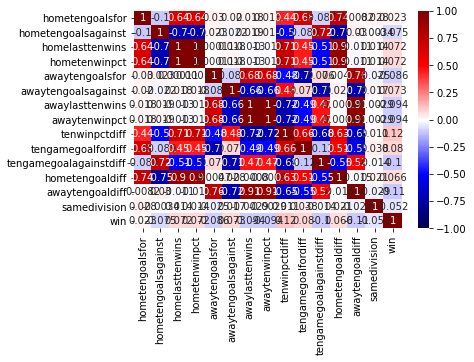

In [32]:
sns.heatmap(nhl_num_ten.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

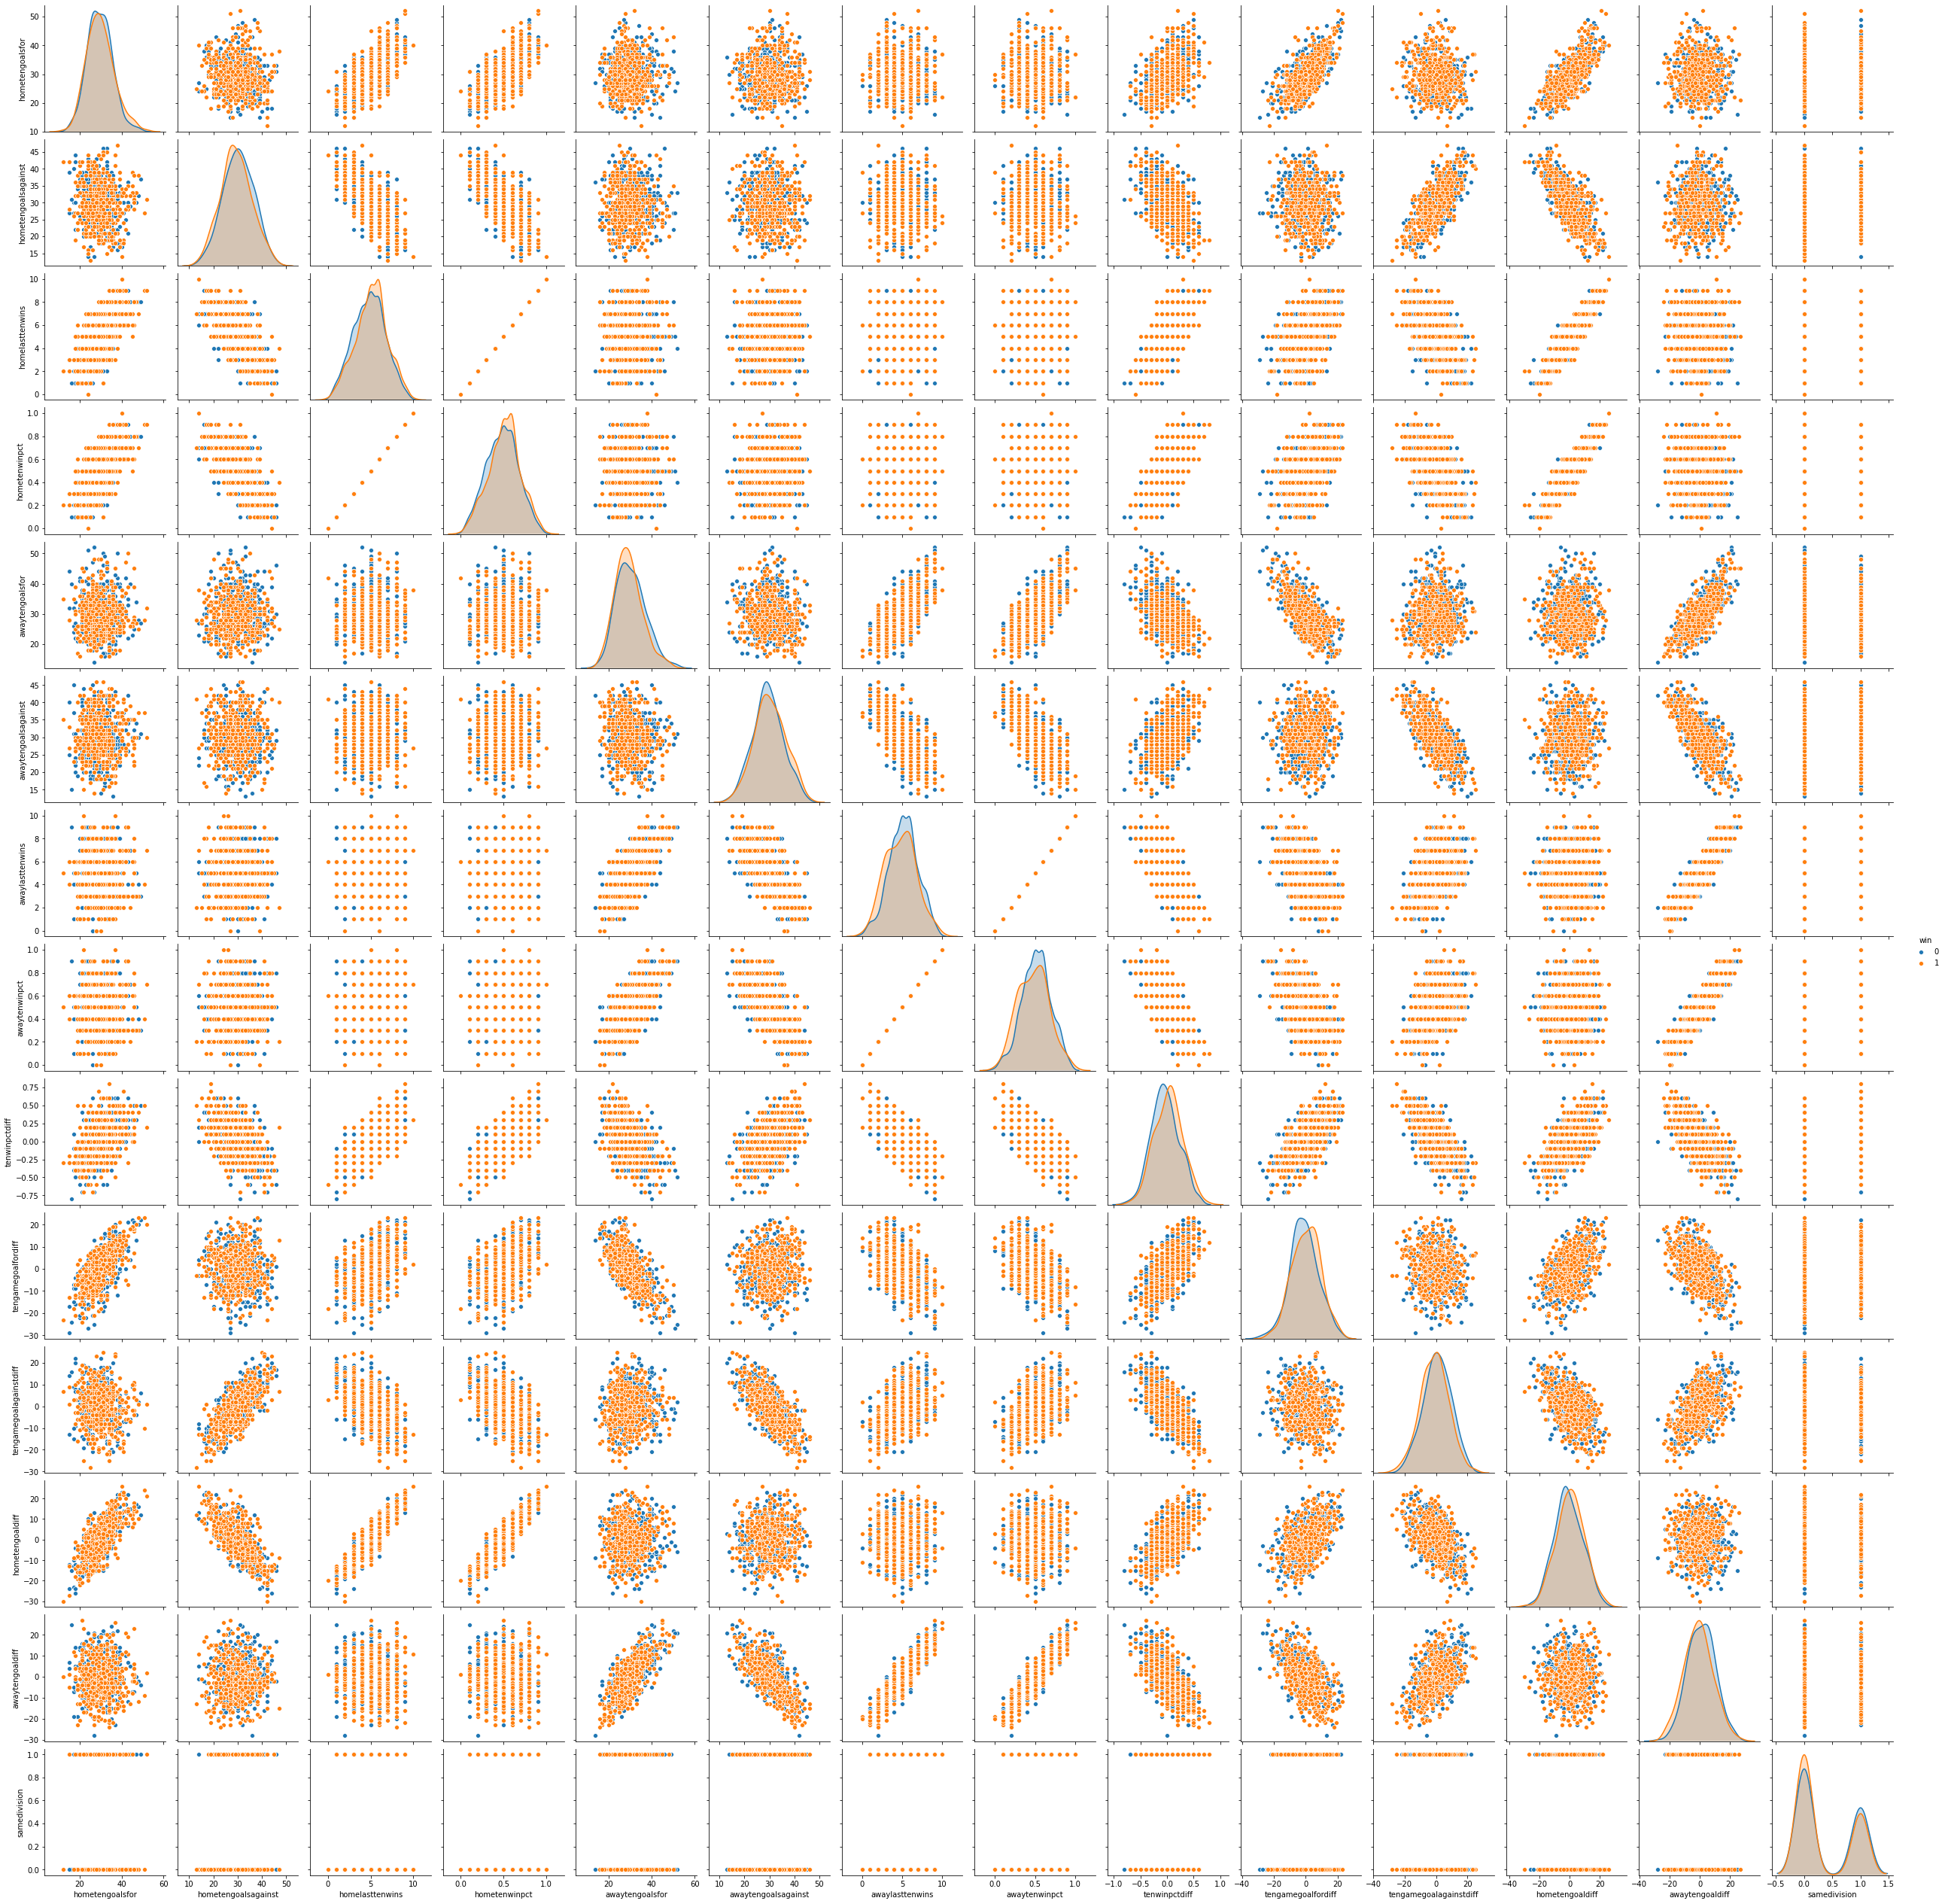

In [33]:
sns.pairplot(nhl_num_ten, hue='win')

In [34]:
nhl_num_ten

,hometengoalsfor,hometengoalsagainst,homelasttenwins,hometenwinpct,awaytengoalsfor,awaytengoalsagainst,awaylasttenwins,awaytenwinpct,tenwinpctdiff,tengamegoalfordiff,tengamegoalagainstdiff,hometengoaldiff,awaytengoaldiff,samedivision,win
0,51.0,27.0,9.0,0.9,28.0,37.0,4.0,0.4,0.5,23.0,-10.0,24.0,-9.0,0,1
1,52.0,31.0,9.0,0.9,32.0,30.0,7.0,0.7,0.2,20.0,1.0,21.0,2.0,1,1
2,46.0,33.0,8.0,0.8,29.0,23.0,7.0,0.7,0.1,17.0,10.0,13.0,6.0,0,1
3,46.0,32.0,8.0,0.8,28.0,28.0,6.0,0.6,0.2,18.0,4.0,14.0,0.0,0,1
4,37.0,27.0,8.0,0.8,31.0,32.0,5.0,0.5,0.3,6.0,-5.0,10.0,-1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,22.0,36.0,2.0,0.2,33.0,32.0,6.0,0.6,-0.4,-11.0,4.0,-14.0,1.0,1,1
772,25.0,32.0,3.0,0.3,33.0,30.0,6.0,0.6,-0.3,-8.0,2.0,-7.0,3.0,1,1
773,28.0,32.0,4.0,0.4,28.0,22.0,6.0,0.6,-0.2,0.0,10.0,-4.0,6.0,0,1
774,29.0,30.0,5.0,0.5,39.0,20.0,7.0,0.7,-0.2,-10.0,10.0,-1.0,19.0,1,0


In [35]:
nhl_num_ten['tengoaldiff'] = nhl_num_ten['hometengoaldiff'] - nhl_num_ten['awaytengoaldiff']

In [36]:
nhl_num_ten.corr()

,hometengoalsfor,hometengoalsagainst,homelasttenwins,hometenwinpct,awaytengoalsfor,awaytengoalsagainst,awaylasttenwins,awaytenwinpct,tenwinpctdiff,tengamegoalfordiff,tengamegoalagainstdiff,hometengoaldiff,awaytengoaldiff,samedivision,win,tengoaldiff
hometengoalsfor,1.000000,-0.103370,0.643299,0.643299,0.030252,0.019784,0.017786,0.017786,0.436132,0.676009,-0.086926,0.737602,0.008187,0.028265,0.023428,0.510043
hometengoalsagainst,-0.103370,1.000000,-0.696662,-0.696662,0.022833,-0.021995,0.018659,0.018659,-0.499147,-0.089018,0.724054,-0.747865,0.030404,-0.003385,-0.074792,-0.544400
homelasttenwins,0.643299,-0.696662,1.000000,1.000000,0.000114,0.017578,-0.012790,-0.012790,0.706579,0.449140,-0.505976,0.902300,-0.011451,0.013541,0.071570,0.639049
hometenwinpct,0.643299,-0.696662,1.000000,1.000000,0.000114,0.017578,-0.012790,-0.012790,0.706579,0.449140,-0.505976,0.902300,-0.011451,0.013541,0.071570,0.639049
awaytengoalsfor,0.030252,0.022833,0.000114,0.000114,1.000000,-0.087284,0.677578,0.677578,-0.479436,-0.716105,0.076404,0.004691,0.756900,-0.025028,-0.086104,-0.529795
awaytengoalsagainst,0.019784,-0.021995,0.017578,0.017578,-0.087284,1.000000,-0.657268,-0.657268,0.477404,0.078163,-0.705503,0.028136,-0.717101,0.016823,0.073283,0.524722
awaylasttenwins,0.017786,0.018659,-0.012790,-0.012790,0.677578,-0.657268,1.000000,1.000000,-0.716613,-0.487111,0.466683,-0.000797,0.905250,-0.002902,-0.094495,-0.638114
awaytenwinpct,0.017786,0.018659,-0.012790,-0.012790,0.677578,-0.657268,1.000000,1.000000,-0.716613,-0.487111,0.466683,-0.000797,0.905250,-0.002902,-0.094495,-0.638114
tenwinpctdiff,0.436132,-0.499147,0.706579,0.706579,-0.479436,0.477404,-0.716613,-0.716613,1.000000,0.658012,-0.683200,0.629943,-0.648626,0.011499,0.116795,0.897343
tengamegoalfordiff,0.676009,-0.089018,0.449140,0.449140,-0.716105,0.078163,-0.487111,-0.487111,0.658012,1.000000,-0.117028,0.511618,-0.552293,0.038189,0.079838,0.746751


In [37]:
thing = nhl_num_ten[['awaytengoaldiff', 'win', 'hometengoaldiff']]

In [38]:
thing.corr()

,awaytengoaldiff,win,hometengoaldiff
awaytengoaldiff,1.000000,-0.108318,-0.015177
win,-0.108318,1.000000,0.066410
hometengoaldiff,-0.015177,0.066410,1.000000


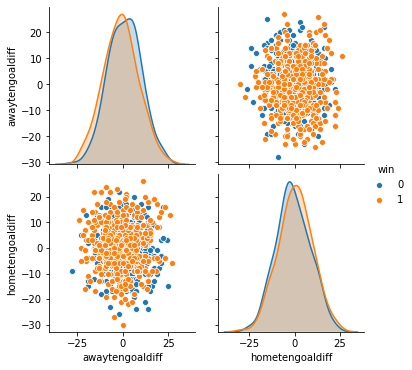

In [39]:
sns.pairplot(thing, hue='win')
plt.savefig('minipairplot.png')

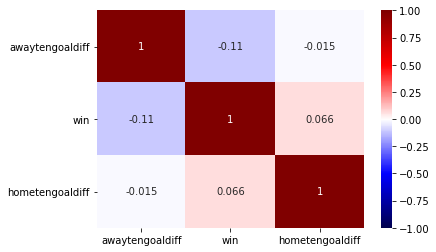

In [40]:
sns.heatmap(thing.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)
plt.savefig('heatmap.png')

In [43]:
nhl_num_ten.tail(20)

,hometengoalsfor,hometengoalsagainst,homelasttenwins,hometenwinpct,awaytengoalsfor,awaytengoalsagainst,awaylasttenwins,awaytenwinpct,tenwinpctdiff,tengamegoalfordiff,tengamegoalagainstdiff,hometengoaldiff,awaytengoaldiff,samedivision,win,tengoaldiff
756,24.0,27.0,5.0,0.5,51.0,30.0,9.0,0.9,-0.4,-27.0,-3.0,-3.0,21.0,0,0,-24.0
757,23.0,29.0,5.0,0.5,32.0,40.0,3.0,0.3,0.2,-9.0,-11.0,-6.0,-8.0,1,1,2.0
758,24.0,24.0,6.0,0.6,26.0,41.0,2.0,0.2,0.4,-2.0,-17.0,0.0,-15.0,0,0,15.0
759,21.0,27.0,5.0,0.5,45.0,18.0,9.0,0.9,-0.4,-24.0,9.0,-6.0,27.0,0,1,-33.0
760,21.0,30.0,4.0,0.4,29.0,21.0,6.0,0.6,-0.2,-8.0,9.0,-9.0,8.0,0,1,-17.0
761,31.0,35.0,5.0,0.5,26.0,31.0,4.0,0.4,0.1,5.0,4.0,-4.0,-5.0,1,0,1.0
762,32.0,36.0,5.0,0.5,30.0,23.0,6.0,0.6,-0.1,2.0,13.0,-4.0,7.0,0,0,-11.0
763,32.0,39.0,4.0,0.4,31.0,33.0,5.0,0.5,-0.1,1.0,6.0,-7.0,-2.0,0,0,-5.0
764,24.0,42.0,1.0,0.1,20.0,32.0,3.0,0.3,-0.2,4.0,10.0,-18.0,-12.0,0,0,-6.0
765,24.0,44.0,0.0,0.0,42.0,41.0,6.0,0.6,-0.6,-18.0,3.0,-20.0,1.0,0,1,-21.0


In [42]:
thing.describe()

,awaytengoaldiff,win,hometengoaldiff
count,776.000000,776.000000,776.000000
mean,0.006443,0.521907,-0.065722
std,9.380623,0.499842,9.314273
min,-28.000000,0.000000,-30.000000
25%,-6.000000,0.000000,-6.000000
50%,0.000000,1.000000,0.000000
75%,6.000000,1.000000,6.000000
max,27.000000,1.000000,26.000000
